In [2]:
#Importing needed libs
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

# Bell State


In [3]:
entangled_00 = bell_state(state='00')
down = fock(2,0)
up = fock(2,1)
state_00 = tensor(down, down)
state_01 = tensor(down, up)
state_10 = tensor(up, down)
state_11 = tensor(up, up)


entangled_00

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.70710678]
 [0.        ]
 [0.        ]
 [0.70710678]]

#For Measuement

Tr(|0><0| * rhoAB.ptrace(0))

-> measures the probability of finding the first particle (rhoAB.ptrace(0)) in |0> state

Tr(|00><00| * rhoAB)

-> measures the probability of finding both particle in |0> state


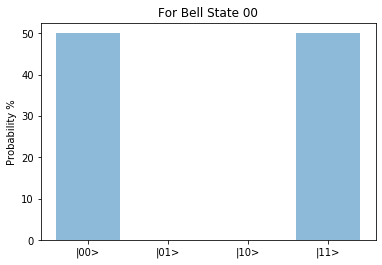

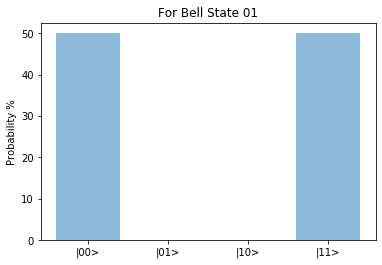

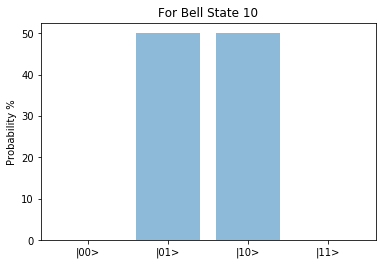

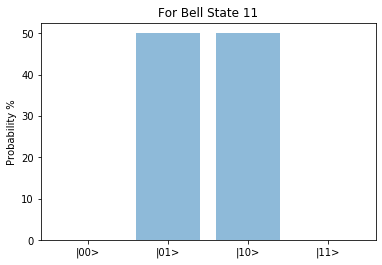

In [36]:
#measuring

def get_probability(entanglement, answer, particle):
    entanglement = entanglement.unit()
    density_ab = entanglement * entanglement.dag()
    A = answer * answer.dag()
    B = A*density_ab.ptrace(particle)
    return B.tr()

def get_probability_both(entanglement, answer,answer2):
    entanglement = entanglement.unit()
    density_ab = entanglement * entanglement.dag()
    A = answer * answer.dag() 
    B = answer2*answer2.dag()
    A = tensor(A,B)
    C = A*density_ab
    return C.tr()

def print_all_single(entaglement):
    print("First particle being down is " + str(float(100 * get_probability(entaglement, down, 0))) + "%")
    print("First particle being up is " + str(float(100 * get_probability(entaglement, up, 0))) + "%")
    print("Second particle being down is " + str(float(100 * get_probability(entaglement, down, 1))) + "%")
    print("Second particle being up is " + str(float(100 * get_probability(entaglement, up, 1))) + "%")
    
def print_all_combined(entaglement):
    print("Particle being down down is " + str(float(100 * get_probability_both(entaglement, down, down))) + "%")
    print("Particle being down up is " + str(float(100 * get_probability_both(entaglement, down, up))) + "%")
    print("Particle being up down is " + str(float(100 * get_probability_both(entaglement, up, down))) + "%")
    print("Particle being up up is " + str(float(100 * get_probability_both(entaglement, up, up))) + "%")

def print_all_detail(entaglement, title):
    print()
    print("------------  " + title + " ----------------")
    print_all_single(entaglement)
    print("--------------------------------------------")
    print_all_combined(entaglement)
    print()
    
def show_on_graph(entaglement, title):
    values = []
    values.append(float(100 * get_probability_both(entaglement, down, down)))
    values.append(float(100 * get_probability_both(entaglement, down, up)))
    values.append(float(100 * get_probability_both(entaglement, up, down)))
    values.append(float(100 * get_probability_both(entaglement, up, up)))
    
    objects = ('|00>', '|01>', '|10>', '|11>')
    y_pos = np.arange(len(objects))
    plt.bar(y_pos, values, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('Probability %')
    plt.title(title)

    plt.show()
    
show_on_graph(entangled_00, "For Bell State 00")

entangled_01 = bell_state(state='01')
show_on_graph(entangled_01, "For Bell State 01")

entangled_10 = bell_state(state='10')
show_on_graph(entangled_10, "For Bell State 10")

entangled_11 = bell_state(state='11')
show_on_graph(entangled_11, "For Bell State 11")

# Partially entangled states


#For Creating mixed entangled states

entangled = x|00><00| + b|01><10| ...


In [5]:
entangled_mixed_clean1 = (np.sqrt(3)/2 * state_00 +  0.5 * state_11).unit() 
entangled_mixed_clean1


Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.8660254]
 [0.       ]
 [0.       ]
 [0.5      ]]

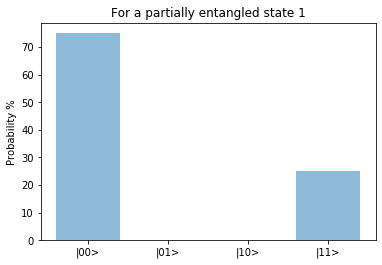

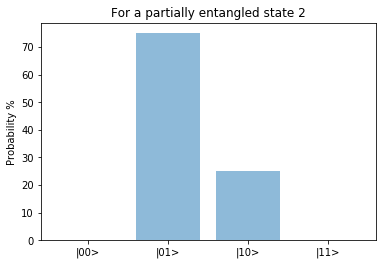

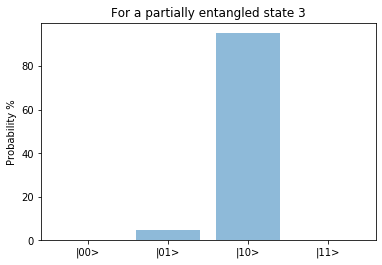

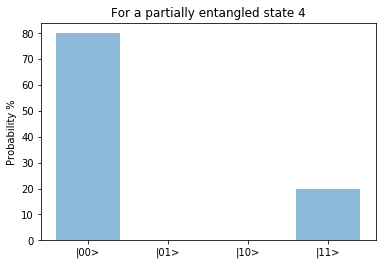

In [38]:
show_on_graph(entangled_mixed_clean1, "For a partially entangled state 1")

entangled_mixed_clean2 = (np.sqrt(3)/2 * state_01 -  0.5 * state_10).unit()
show_on_graph(entangled_mixed_clean2, "For a partially entangled state 2")

entangled_mixed_1 = (0.5 * state_01 -  2.2 * state_10).unit()
show_on_graph(entangled_mixed_1, "For a partially entangled state 3")

entangled_mixed_2 = (1.2 * state_00 -  0.6 * state_11).unit()
show_on_graph(entangled_mixed_2, "For a partially entangled state 4")


# Entangled states with random errors

In [138]:
entangled_imperfect_1 = (0.7 * state_00 + 0.1 * state_01 + 0.1 * state_10 +   0.7 * state_11).unit() 
entangled_imperfect_1

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.7]
 [0.1]
 [0.1]
 [0.7]]

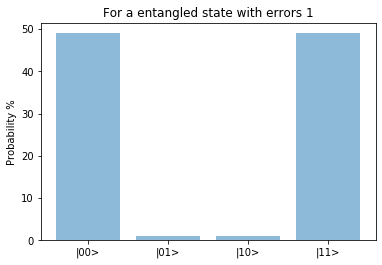

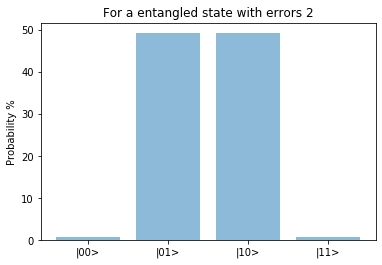

In [39]:
show_on_graph(entangled_imperfect_1, "For a entangled state with errors 1")

entangled_imperfect_2 = (0.1 * state_00 + 0.8 * state_01 + 0.8 * state_10 +   0.1 * state_11).unit()
show_on_graph(entangled_imperfect_2, "For a entangled state with errors 2")

# Entangled states with time dependent coefficients

In [66]:
def create_matrix(angle):
    return Qobj([[np.cos(angle), 0, 0, -1j * np.sin(angle)], [0, np.cos(angle), -1j * np.sin(angle), 0], [0, -1j * np.sin(angle), np.cos(angle), 0], [-1j * np.sin(angle), 0, 0, np.cos(angle)]])

create_matrix(np.pi/4)

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[0.70710678+0.j         0.        +0.j         0.        +0.j
  0.        -0.70710678j]
 [0.        +0.j         0.70710678+0.j         0.        -0.70710678j
  0.        +0.j        ]
 [0.        +0.j         0.        -0.70710678j 0.70710678+0.j
  0.        +0.j        ]
 [0.        -0.70710678j 0.        +0.j         0.        +0.j
  0.70710678+0.j        ]]

# Hamiltonian-based time-dependent states

In [129]:
N = 2

psi0 = Qobj([[1], [0], [0], [0]])
print(psi0)

w = 1 * 2 * np.pi 
# H = 0.5 * w * create_matrix(np.pi/4)
H = Qobj([[1, 0, 0, 1], [0, 1, 1, 0], [0, 1, -1, 0], [1, 0, 0, -1]])
print(H)

gamma = 0.1 * w
c_ops = Qobj([[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]])
t = np.linspace(0, 10, 201)
print(c_ops)

result_me = mesolve(H, psi0, t, c_ops)
projection(4,3,0)

Quantum object: dims = [[4], [1]], shape = (4, 1), type = ket
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]]
Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  1.]
 [ 0.  1.  1.  0.]
 [ 0.  1. -1.  0.]
 [ 1.  0.  0. -1.]]
Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]

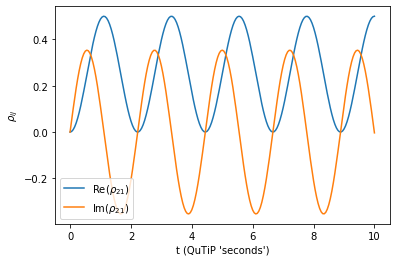

In [128]:
plt.plot(t,np.real(expect(result_me.states, projection(4,3,0))), label=r'Re($\rho_{21}$)');
plt.plot(t,np.imag(expect(result_me.states, projection(4,3,0))), label=r'Im($\rho_{21}$)');
plt.ylabel(r"$\rho_{ij}$")
plt.xlabel("t (QuTiP 'seconds')")
plt.legend()
plt.show()